<a href="https://colab.research.google.com/github/Worlddatascience/DataScienceCohort/blob/master/13_Credit_Card_Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE TEAM 1**

Anade Davis - Data Science Manager

Christopher Rutherford - Data Scientist 

Tanjeel Ahmed - Data Science Researcher

Gabe Smithline - Quantitative Analyst

Berkalp Altay - Data Analyst

Zain Dwiat - Data Scientist

## Overview of Problem

In this team project, we will use machine and deep learning algorithms to attempt to identify fraudulent credit card transactions.

The detection of a fraudulent transaction can be quite difficult, as the amount of fraudulent transactions is far outnumbered by the number of legitimate transactions. In a typical day of recorded transactions, less than 1% of the transactions are fraudulent.


## We begin by importing the essential libraries and the dataset:

In [ ]:
import numpy as np #save data in arrays for quick computations
import pandas as pd #save data in dataframes to quickly and conveniently manipulate and access large amounts of data
import matplotlib.pyplot as plt #create visualizations/plots of the data
import seaborn as sns #sets the style of plots
import json #reading the database of kaggle datasets

In [ ]:
sns.set()

### Importing the data

In [ ]:
!wget https://www.dropbox.com/s/kufo0es183lb03z/creditcard.csv?raw=1

--2020-10-13 00:49:53--  https://www.dropbox.com/s/kufo0es183lb03z/creditcard.csv?raw=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kufo0es183lb03z/creditcard.csv [following]
--2020-10-13 00:49:54--  https://www.dropbox.com/s/raw/kufo0es183lb03z/creditcard.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5bcc40a3d2994cd80240afec95.dl.dropboxusercontent.com/cd/0/inline/BBL6UmyV_6S4e-ygxTkM6DCdAyT5HWkMy95HXlaiCBLIoGpfMHsjPiaPJdzzITSXtZoB-mr_DLr0eDHQP3C5x40hivXs5GxPe7ZnErR1ZERgnR0JisuFVzUsGWUUutVToS8/file# [following]
--2020-10-13 00:49:54--  https://uc5bcc40a3d2994cd80240afec95.dl.dropboxusercontent.com/cd/0/inline/BBL6UmyV_6S4e-ygxTkM6DCdAyT5HWkMy95HXlaiCBLIoGpfMHsjPiaPJdzzITSXtZoB-mr_DLr0eDHQP3C5x40hivXs5GxPe7ZnEr

We can now bring in our data as a pandas dataframe and ensure it imported correctly:

In [ ]:
df = pd.read_csv('creditcard.csv?raw=1') #import our data from the csv file

In [ ]:
df.head() #print the first 5 entries in our dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isna().sum().sum() #check for any missing data

0

In [ ]:
df.dtypes #verify that each column is the correct data type

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
fraud_count=sum(df['Class'].values==1)
legit_count=sum(df['Class'].values==0)
print("Number of legitimate transactions: {} ({:.3f}% of total)".format(legit_count, 100*legit_count/(fraud_count+legit_count)))
print("Number of fraudulent transactions: {}    ({:.3f}% of total)".format(fraud_count, 100*fraud_count/(fraud_count+legit_count)))


Number of legitimate transactions: 284315 (99.827% of total)
Number of fraudulent transactions: 492    (0.173% of total)


Clearly, the number of fraudulent transactions is extremely outnumbered by the number of legitimate transactions. Traditional machine learning algorithms/methods will likely have trouble being able to accurately learn from such imbalanced data.

Unsupervised machine learning models are typically the optimal choice for learning from and classifying data with a large class imbalance.

There are several unsupervised model options for us to attempt to identify these fraudulent transactions (https://spd.group/machine-learning/credit-card-fraud-detection/):
- Local Outlier Factor (LOF)
- One-class Support Vector Machine (SVM)
- Isolation Forest

A few supervised classifiers we can use include:
- Logistic Regression
- Random Forest
- k-Nearest Neighbors (kNN)

Before diving right into modeling, we can perform some more EDA to get a better picture of what our data looks like, which may help us make a more informed decision on which model(s) could be appropriate.

We can look at the two variables we do have information for, `Time` and `Amount`:

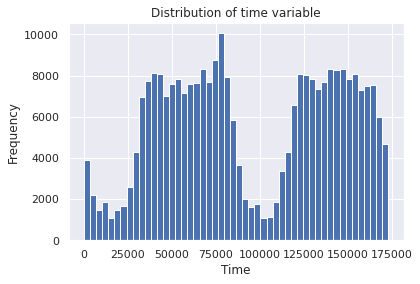

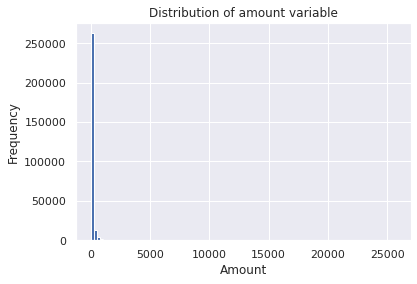

In [ ]:
plt.hist(df['Time'], bins=50)
plt.title("Distribution of time variable")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()
plt.hist(df['Amount'], bins=100)
plt.title("Distribution of amount variable")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

Due to how these two variables are distributed (`Time` is bimodal while `Amount` is very right skewed), it would be ideal to normalize them, such as mapping them to the interval $[0,1]$. We can apply this transformation to the entire dataset as well since each variable (except `Class`) is continuous.

We can look at how correlated each of these variables are with each other:

In [ ]:
plt.figure(figsize=(14,12))
#create a heatmap of the correlation between each pair of variables
sns.heatmap(df.corr(),
            square=True, #make each box in the heatmap square
            annot=True, #include correlation value inside each square
            fmt=".1f", #round correlations to 1 decimal place
            annot_kws={"size": 9})
plt.show()

The variable `V17` has the strongest correlation with `Class`, so it is worth investigating a bit more:

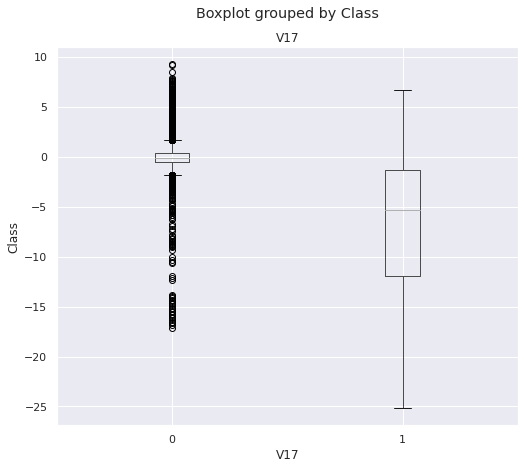

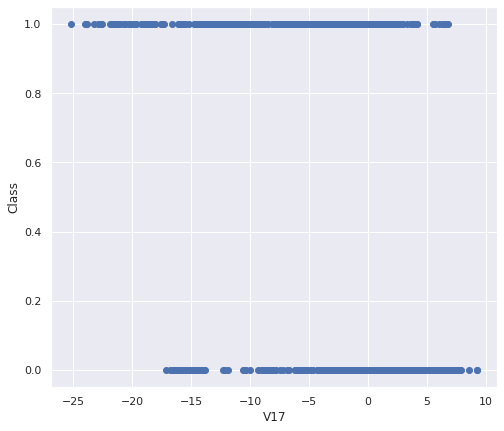

In [ ]:
df.boxplot(column='V17', by='Class', figsize=(8,7))
plt.xlabel("V17")
plt.ylabel("Class")
plt.show()
plt.figure(figsize=(8,7))
plt.scatter(x=df['V17'], y=df['Class'])
plt.xlabel("V17")
plt.ylabel("Class")
plt.show()

A plot like this already makes a pattern jump out: more negative values of `V17` seem to be more connected to fraudulent transactions.

With no data missing, no highly correlated X variables (i.e. no multicollinearity), and pre-transformed data, there is not much else to do in this case. We can begin preparing the data and training our models.

## Data prep

In [ ]:
x = df.iloc[0:, 0:30] # use every variable except Class as X
y = df['Class'] # class is used as the Y variable

NameError: ignored

In [ ]:
x # printing to verify X is properly assigned

NameError: ignored

In [ ]:
y #verify Y is properly assigned

Before we can begin plugging our data into our classifiers, we need to properly split our data into train/test splits. Due to how imbalanced it is, we can use stratified sampling to ensure that the proportions are maintained when creating the splits. Otherwise, we may end up having no fraudulent cases in one of our sets.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
#train test split gives us our splits
#StraifiedKFold lets us perform stratified cross-validation, if we need to
from sklearn.metrics import classification_report, confusion_matrix, f1_score #view detailed metrics for model performance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y)

Now, we can apply our scaler to the X variables:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #scale down Time and Amount variables to interval (0, 1)
scaler.fit(X_train) #fit the scaler to the training data

In [ ]:
X_train_scaled = scaler.transform(X_train) #apply the scaler to the training data
X_test_scaled = scaler.transform(X_test) #apply the scaler to the testing data
#x.loc[:,'Time']=scaler.fit_transform(np.array(x['Time']).reshape(-1, 1))
#x.loc[:,'Amount']=scaler.fit_transform(np.array(x['Amount']).reshape(-1, 1))

In [ ]:
y_train, y_test = np.array(y_train), np.array(y_test) # convert y variables to numpy arrays

In [ ]:
# calculate percentage of fraudulent cases in each y array
sum(y_train==1)/(sum(y_train==0)+sum(y_train==1)), sum(y_test==1)/(sum(y_test==0)+sum(y_test==1))

Stratifying on `y` allows us to maintain the existing proportionality from the original data.

## Contamination Rate

### Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
contamination_rate=fraud_count/(fraud_count+legit_count)

In [ ]:
# set up the model
lof = LocalOutlierFactor(n_neighbors = 20,
                         contamination = contamination_rate, # how much of the data is "contaminated" with fraudulent cases
                         n_jobs = -1)

In [ ]:
y_pred = lof.fit_predict(X_train_scaled) #fitting the model to the training data, can take a few minutes

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

The local forest outlier outputs `1` for "normal" (legitimate cases) data points and `-1` for outliers (fraudulent cases). In convention with the data set and to easily compare this prediction to the test set, we perform the following conversion:
- `1` set to `0`
- `-1` set to `1`

In [ ]:
np.place(y_pred, y_pred==1, 0) #replace 1's with 0's

In [ ]:
np.place(y_pred, y_pred==-1, 1) #replace -1's with 1's

In [ ]:
y_pred.mean(), y_test.mean()

(0.0017274876524425926, 0.0017274795651807534)

In [ ]:
print(classification_report(y_train, y_pred,
                            labels=[0, 1], target_names=['Legitimate', 'Fraudulent'],
                            zero_division=0))

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00    213236
  Fraudulent       0.01      0.01      0.01       369

    accuracy                           1.00    213605
   macro avg       0.50      0.50      0.50    213605
weighted avg       1.00      1.00      1.00    213605



In [ ]:
conf_mat=confusion_matrix(y_train, y_pred, labels=[0, 1])
print(conf_mat)

[[212870    366]
 [   366      3]]


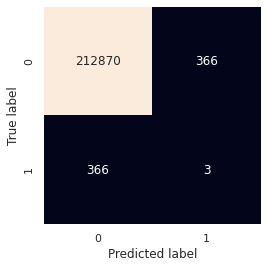

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Unfortunately, our current strategy/model has a difficult time with the fraudulent class.

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
if_model = IsolationForest(contamination = contamination_rate)

In [ ]:
if_model.fit(X_train_scaled)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.001727485630620034, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_train = if_model.predict(X_train_scaled)

In [ ]:
np.place(y_pred_train, y_pred_train==1, 0) #replace 1's with 0's

In [ ]:
np.place(y_pred_train, y_pred_train==-1, 1) #replace -1's with 1's

In [ ]:
print(classification_report(y_train, y_pred_train,
                            labels=[0, 1], target_names=['Legitimate', 'Fraudulent'],
                            zero_division=0))

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00    213236
  Fraudulent       0.27      0.27      0.27       369

    accuracy                           1.00    213605
   macro avg       0.63      0.63      0.63    213605
weighted avg       1.00      1.00      1.00    213605



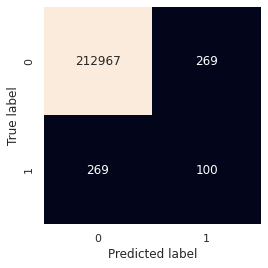

In [ ]:
conf_mat=confusion_matrix(y_train, y_pred_train, labels=[0, 1])
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
y_pred_if = if_model.predict(X_test_scaled)

In [ ]:
np.place(y_pred_if, y_pred_if==1, 0) #replace 1's with 0's

In [ ]:
np.place(y_pred_if, y_pred_if==-1, 1) #replace -1's with 1's

In [ ]:
print(classification_report(y_test, y_pred_if,
                            labels=[0, 1], target_names=['Legitimate', 'Fraudulent'],
                            zero_division=0))

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     71079
  Fraudulent       0.23      0.26      0.24       123

    accuracy                           1.00     71202
   macro avg       0.61      0.63      0.62     71202
weighted avg       1.00      1.00      1.00     71202



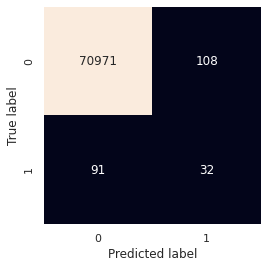

In [ ]:
conf_mat=confusion_matrix(y_test, y_pred_if, labels=[0, 1])
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Once again, our models are having trouble being able to accurately classify the transactions. The next course of action should be attempting SMOTE (synthetic minority oversampling technique). This generates synthetic samples of the minority (fraudulent) classes to help the model have an easier time training and predicting new cases.

Note that when preparing the data, we only perform SMOTE on the training data. While we want the model to get a better idea of how fraudulent transactions look, we also want it to test on realistic data - data with a very small percentage of the transactions are fraudulent.

## SMOTE

SMOTE enables us to generate synthetic versions of fraudulent transactions in order to make up for the lack of such transactions in our data.

In [ ]:
from imblearn.over_sampling import SMOTE #library for performing synthetic oversampling
from collections import Counter #count number of cases before and after oversampling

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(x, y)

In [ ]:
y_train_sm, y_test_sm = np.array(y_train_sm), np.array(y_test_sm)

In [ ]:
X_train_sm.shape, X_test_sm.shape, y_train_sm.shape, y_test_sm.shape

((213605, 30), (71202, 30), (213605,), (71202,))

In [ ]:
sm = SMOTE(sampling_strategy='minority')

In [ ]:
print("y before SMOTE:", Counter(y_train_sm)) #count how many of each type of transaction are in the original training set
X_train_res, y_train_res = sm.fit_resample(X_train_sm, y_train_sm)
print("y after SMOTE:", Counter(y_train_res)) #count how many of each type of transaction are in the resampled training set

y before SMOTE: Counter({0: 213222, 1: 383})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


y after SMOTE: Counter({0: 213222, 1: 213222})


## Random Undersampling

Another resampling technique is random undersampling, which randomly chooses just enough samples from the majority class so that there are a balanced amount of samples from each class.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler() #initialize the undersampler

We can reuse the train/test split from the stratified sampling method:

In [ ]:
X_train_rs, y_train_rs = rus.fit_resample(X_train_scaled, y_train) #resample a new training set from the existing one

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


We only perform this undersampling on the training set in order to keep the proportion of fraudulent transactions in our testing set realistic.

In [ ]:
X_train_rs.shape, y_train_rs.shape #verify size of training sets

((738, 30), (738,))

In [ ]:
fraud_count_rus=sum(y_train_rs==1)
legit_count_rus=sum(y_train_rs==0)
print("Number of legitimate transactions: {} ({:.0f}% of total)".format(legit_count_rus, 100*legit_count_rus/(fraud_count_rus+legit_count_rus)))
print("Number of fraudulent transactions: {} ({:.0f}% of total)".format(fraud_count_rus, 100*fraud_count_rus/(fraud_count_rus+legit_count_rus)))

Number of legitimate transactions: 369 (50% of total)
Number of fraudulent transactions: 369 (50% of total)


### Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
neighbors=7 #hyperparameter for LOF to decide threshold for being an outlier
lof_rus = LocalOutlierFactor(n_neighbors=neighbors, novelty=True)

In [ ]:
lof_rus.fit(X_train_rs)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=7, novelty=True, p=2)

In [ ]:
y_pred = lof_rus.predict(X_test_scaled) #create predictions on the testing data

The local forest outlier outputs `1` for "normal" (legitimate cases) data points and `-1` for outliers (fraudulent cases). In convention with the data set and to easily compare this prediction to the test set, we perform the following conversion:
- `1` set to `0`
- `-1` set to `1`

In [ ]:
np.place(y_pred, y_pred==1, 0) #replace 1's with 0's

In [ ]:
np.place(y_pred, y_pred==-1, 1) #replace -1's with 1's

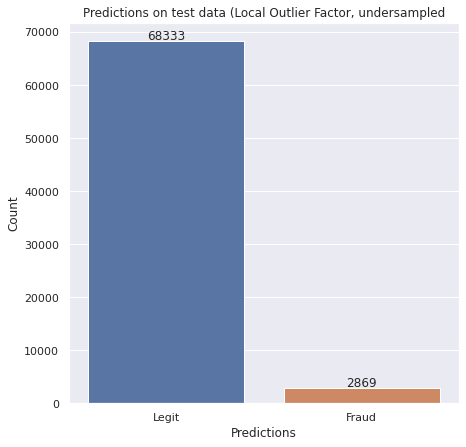

In [ ]:
preds = [sum(y_pred==0), sum(y_pred == 1)]
plt.figure(figsize = (7,7))
splot = sns.barplot(x = ['Legit','Fraud'], y = preds)
plt.title("Predictions on test data (Local Outlier Factor, undersampled")
plt.xlabel("Predictions")
plt.ylabel("Count")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() - 800), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.00      0.02      0.00       123

    accuracy                           0.96     71202
   macro avg       0.50      0.49      0.49     71202
weighted avg       1.00      0.96      0.98     71202



In [ ]:
conf_mat=confusion_matrix(y_test, y_pred)

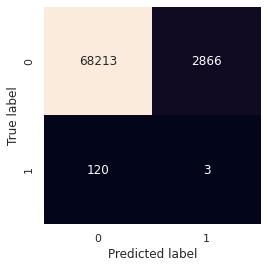

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

#### Training set

In [ ]:
if_rus = IsolationForest()

In [ ]:
y_pred_train = if_rus.fit_predict(X_train_rs)

In [ ]:
np.place(y_pred_train, y_pred_train == 1, 0)

In [ ]:
np.place(y_pred_train, y_pred_train == -1, 1)

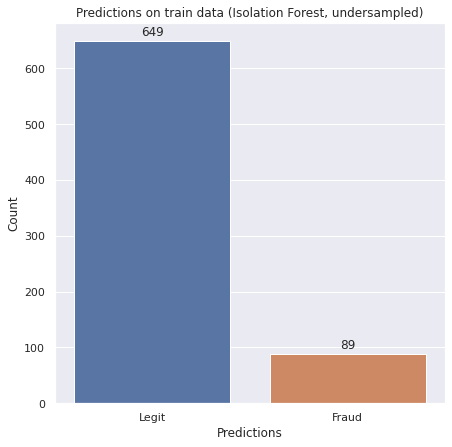

In [ ]:
#count how many transactions were predicted to be legit and how many predicted fraud
preds = [sum(y_pred_train == 0), sum(y_pred_train == 1)]
plt.figure(figsize = (7,7))
#create a barplot to visualize prediction count
splot = sns.barplot(x = ['Legit','Fraud'], y = preds)
plt.title("Predictions on train data (Isolation Forest, undersampled)")
plt.xlabel("Predictions")
plt.ylabel("Count")

# adds numbers above each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [ ]:
print(classification_report(y_train_rs, y_pred_train, zero_division=0))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71       369
           1       0.92      0.22      0.36       369

    accuracy                           0.60       738
   macro avg       0.74      0.60      0.53       738
weighted avg       0.74      0.60      0.53       738



In [ ]:
conf_mat=confusion_matrix(y_train_rs, y_pred_train)

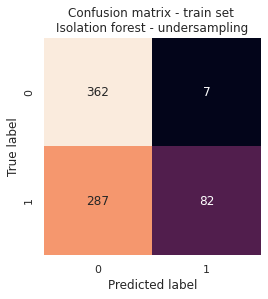

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.title("Confusion matrix - train set \nIsolation forest - undersampling")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Testing set

In [ ]:
y_pred_if = if_rus.fit(X_train_scaled)

In [ ]:
y_pred_if = if_rus.predict(X_test_scaled)

In [ ]:
y_pred_if

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
np.place(y_pred_if, y_pred_if == 1, 0)

In [ ]:
np.place(y_pred_if, y_pred_if == -1, 1)

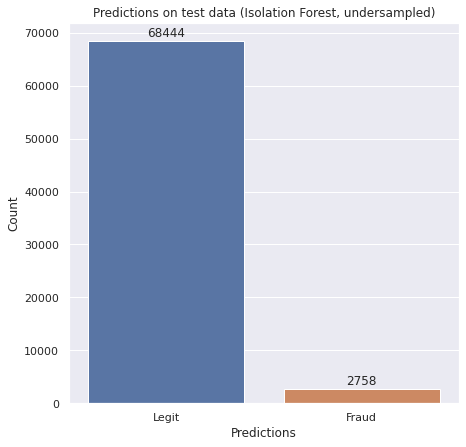

In [ ]:
#count how many transactions were predicted to be legit and how many predicted fraud
preds = [sum(y_pred_if == 0), sum(y_pred_if == 1)]
plt.figure(figsize = (7,7))
#create a barplot to visualize prediction count
splot = sns.barplot(x = ['Legit','Fraud'], y = preds)
plt.title("Predictions on test data (Isolation Forest, undersampled)")
plt.xlabel("Predictions")
plt.ylabel("Count")

# adds numbers above each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() - 200), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
print(classification_report(y_test, y_pred_if, zero_division=0, digits=2))
print("Balanced accuracy:",balanced_accuracy_score(y_test, y_pred_if))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.82      0.07       123

    accuracy                           0.96     71202
   macro avg       0.52      0.89      0.53     71202
weighted avg       1.00      0.96      0.98     71202

Balanced accuracy: 0.891878634525171


In [ ]:
conf_mat=confusion_matrix(y_test, y_pred_if)

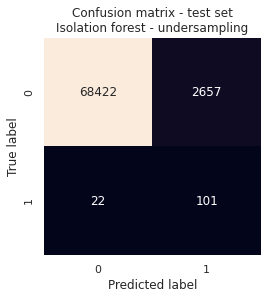

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.title("Confusion matrix - test set\nIsolation forest - undersampling")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

While we do have a marked improvement over the local outlier factor, we still have a handful of fraudulent transactions being classified as legit - about 100 of the 123 fraudulent transactions were correctly identified. Undersampling seems to be helping, but making it a perfect 50/50 split between legit and fraud may be causing the model to overestimate the prevalence of fraud, as a handful of legit ones are being classified as fraud.

## CatBoost

[CatBoost](https://catboost.ai/) boasts both a great reduction in computation time and improved decision tree performance.


In [ ]:
pip install catboost

     |████████████████████████████████| 66.2MB 46kB/s 


In [ ]:
from catboost import CatBoostClassifier

We adjust the class weights so the model learns that fraudulent transactions are more costly than legitimate ones. The costs incurred from a fraudulent transaction misclassified as legitimate are much higher than a legit one classified as fraud.

In [ ]:
cbc = CatBoostClassifier(class_weights=[1, 10])

### Fitting the model

In [ ]:
cbc.fit(X_train_rs, y_train_rs)

Learning rate set to 0.009049
0:	learn: 0.6808937	total: 7.46ms	remaining: 7.46s
1:	learn: 0.6649987	total: 14ms	remaining: 6.99s
2:	learn: 0.6486871	total: 20.4ms	remaining: 6.79s
3:	learn: 0.6370938	total: 27ms	remaining: 6.72s
4:	learn: 0.6230203	total: 34.1ms	remaining: 6.79s
5:	learn: 0.6084316	total: 41.2ms	remaining: 6.82s
6:	learn: 0.5963027	total: 49.1ms	remaining: 6.97s
7:	learn: 0.5802690	total: 57ms	remaining: 7.06s
8:	learn: 0.5685000	total: 64.8ms	remaining: 7.14s
9:	learn: 0.5563935	total: 72.7ms	remaining: 7.2s
10:	learn: 0.5437311	total: 80.4ms	remaining: 7.23s
11:	learn: 0.5338627	total: 88.1ms	remaining: 7.25s
12:	learn: 0.5241687	total: 95.9ms	remaining: 7.28s
13:	learn: 0.5135766	total: 104ms	remaining: 7.3s
14:	learn: 0.5013493	total: 116ms	remaining: 7.61s
15:	learn: 0.4926088	total: 126ms	remaining: 7.78s
16:	learn: 0.4834320	total: 134ms	remaining: 7.76s
17:	learn: 0.4707328	total: 142ms	remaining: 7.75s
18:	learn: 0.4625178	total: 149ms	remaining: 7.7s
19:	lea

### Creating and evaluating predictions on the test data

In [ ]:
preds_class = cbc.predict(X_test_scaled)

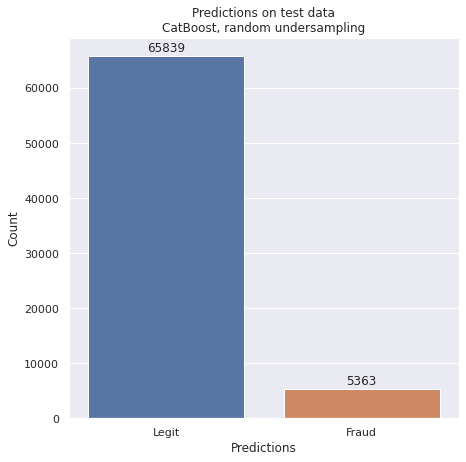

In [ ]:
#count how many transactions were predicted to be legit and how many predicted fraud
preds = [sum(preds_class == 0), sum(preds_class == 1)]
plt.figure(figsize = (7,7))
#create a barplot to visualize prediction count
splot = sns.barplot(x = ['Legit','Fraud'], y = preds)
plt.title("Predictions on test data\nCatBoost, random undersampling")
plt.xlabel("Predictions")
plt.ylabel("Count")

# adds numbers above each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height() - 300), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [ ]:
print(classification_report(y_test, preds_class, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     71079
           1       0.02      0.95      0.04       123

    accuracy                           0.93     71202
   macro avg       0.51      0.94      0.50     71202
weighted avg       1.00      0.93      0.96     71202



The recall for both classes is very good, but the precision for the fraud class remains quite poor.

In [ ]:
conf_mat=confusion_matrix(y_test, preds_class)

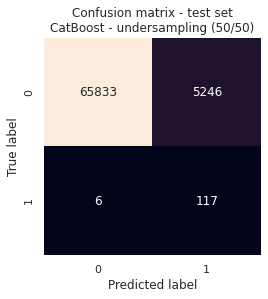

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.title("Confusion matrix - test set\nCatBoost - undersampling (50/50)")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

And here we see what is causing our fraudulent class's precision to tank - a majority of data points that were classified as fraud are actually legit. However, this model still performs even better than any previous model tested thus far.

### 5% fraud sample

We can adjust the ratio in our random undersampling so that `RandomUnderSampler` samples more legitimate transactions. We want CatBoost to know that legit transactions are more common than fraudulent ones. Here we attempt setting it to 5%:

In [ ]:
rus_more_legit = RandomUnderSampler(ratio=0.05)

In [ ]:
X_train_rs_2, y_train_rs_2 = rus_more_legit.fit_resample(X_train_scaled, y_train) #resample a new training set from the existing one

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_rs_2.shape, y_train_rs_2.shape #verify size of training sets

((7749, 30), (7749,))

In [ ]:
fraud_count_rus=sum(y_train_rs_2==1)
legit_count_rus=sum(y_train_rs_2==0)
print("Number of legitimate transactions: {} ({:.0f}% of total)".format(legit_count_rus, 100*legit_count_rus/(fraud_count_rus+legit_count_rus)))
print("Number of fraudulent transactions: {} ({:.0f}% of total)".format(fraud_count_rus, 100*fraud_count_rus/(fraud_count_rus+legit_count_rus)))

Number of legitimate transactions: 7380 (95% of total)
Number of fraudulent transactions: 369 (5% of total)


In [ ]:
cbc2 = CatBoostClassifier(class_weights=[1, 10])

In [ ]:
cbc2.fit(X_train_rs_2, y_train_rs_2)

Learning rate set to 0.024697
0:	learn: 0.6524309	total: 10.1ms	remaining: 10s
1:	learn: 0.6127699	total: 20.1ms	remaining: 10s
2:	learn: 0.5703745	total: 31.2ms	remaining: 10.4s
3:	learn: 0.5381994	total: 40.4ms	remaining: 10.1s
4:	learn: 0.5049646	total: 49.4ms	remaining: 9.82s
5:	learn: 0.4757695	total: 58.6ms	remaining: 9.7s
6:	learn: 0.4524973	total: 67.5ms	remaining: 9.57s
7:	learn: 0.4312354	total: 76.4ms	remaining: 9.48s
8:	learn: 0.4098739	total: 85.5ms	remaining: 9.42s
9:	learn: 0.3870971	total: 94.4ms	remaining: 9.34s
10:	learn: 0.3633777	total: 104ms	remaining: 9.31s
11:	learn: 0.3464614	total: 112ms	remaining: 9.25s
12:	learn: 0.3298909	total: 122ms	remaining: 9.24s
13:	learn: 0.3149913	total: 131ms	remaining: 9.2s
14:	learn: 0.3012638	total: 140ms	remaining: 9.16s
15:	learn: 0.2888892	total: 148ms	remaining: 9.13s
16:	learn: 0.2761737	total: 157ms	remaining: 9.1s
17:	learn: 0.2665873	total: 167ms	remaining: 9.08s
18:	learn: 0.2557490	total: 175ms	remaining: 9.06s
19:	lear

In [ ]:
preds_class_2 = cbc2.predict(X_test_scaled)

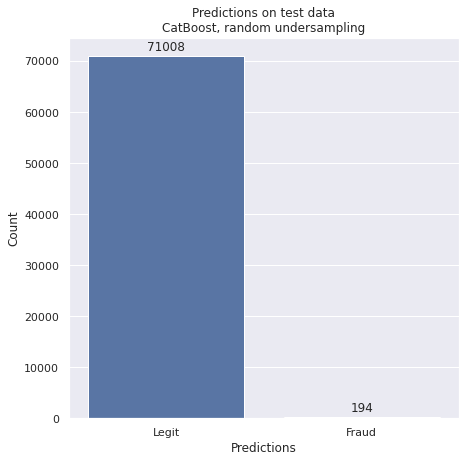

In [ ]:
#count how many transactions were predicted to be legit and how many predicted fraud
preds = [sum(preds_class_2 == 0), sum(preds_class_2 == 1)]
plt.figure(figsize = (7,7))
#create a barplot to visualize prediction count
splot = sns.barplot(x = ['Legit','Fraud'], y = preds)
plt.title("Predictions on test data\nCatBoost, random undersampling")
plt.xlabel("Predictions")
plt.ylabel("Count")

# adds numbers above each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [ ]:
print(classification_report(y_test, preds_class_2, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.54      0.85      0.66       123

    accuracy                           1.00     71202
   macro avg       0.77      0.92      0.83     71202
weighted avg       1.00      1.00      1.00     71202



Compared to the previous CatBoost model, the F-score for the fraudulent class is much higher.

In [ ]:
conf_mat=confusion_matrix(y_test, preds_class_2)

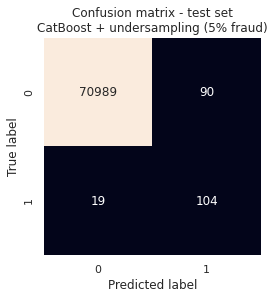

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.title("Confusion matrix - test set\nCatBoost + undersampling (5% fraud)")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

While almost none of the legitimate transactions were classified as fraudulent compared to the previous model, we ended up losing a bit of recall on the fraudulent class.

## Logistic Regression

Breaking up into Testing and Training Data

In [ ]:
#logistic regression 
#break up data 
#Break up into training and test data
#training data
X_trainlr = (df.sample(frac=.8))
#testing 
#takes all values not in x training 
X_testlr = df.loc[~df.index.isin(X_trainlr.index)]

In [ ]:
#y train
Y_trainlr = X_trainlr['Class']
#y test
Y_testlr = X_testlr['Class']

In [ ]:
X_trainlr, X_testlr = X_trainlr.drop(labels="Class", axis=1), X_testlr.drop(labels="Class", axis=1)

In [ ]:
X_trainlr.shape, Y_trainlr.shape, X_testlr.shape, Y_testlr.shape

((227846, 30), (227846,), (56961, 30), (56961,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
param_grid = {'C':[.001, .01, .1, 1, 10, 100, 1000]}
clf  = GridSearchCV(LogisticRegression(C=1, penalty='l1', solver='liblinear'), param_grid)

clf.fit(X_trainlr, Y_trainlr)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_params_

{'C': 0.1}

In [ ]:
y_preds_lr_train = clf.predict(X_trainlr)

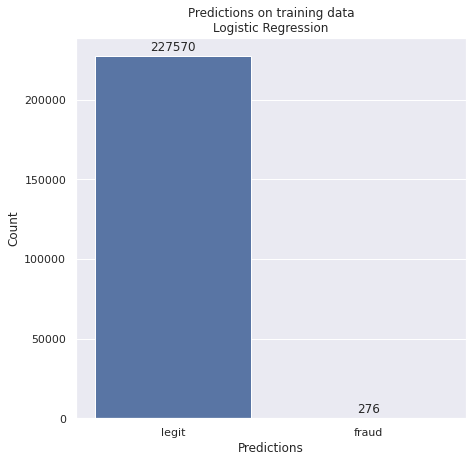

In [ ]:
#Bar Graph
#count how many transactions were predicted to be legit and how many predicted fraud
preds = [sum(y_preds_lr_train == 0), sum(y_preds_lr_train == 1)]
plt.figure(figsize = (7,7))
#create a barplot to visualize prediction count
splot = sns.barplot(x = ["legit", "fraud"], y =  preds)
plt.title("Predictions on training data\nLogistic Regression")
plt.xlabel("Predictions")
plt.ylabel("Count")

# adds numbers above each bar
for p in splot.patches:
     splot.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
corners = ((0, 0), (1000, 1000))
splot.update_datalim(corners)
plt.show()

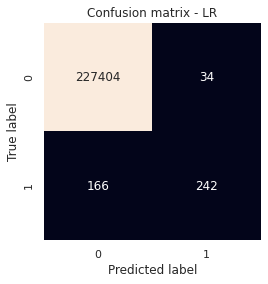

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_trainlr, y_preds_lr_train)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.title("Confusion matrix - LR")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(classification_report(Y_trainlr, y_preds_lr_train, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227438
           1       0.88      0.59      0.71       408

    accuracy                           1.00    227846
   macro avg       0.94      0.80      0.85    227846
weighted avg       1.00      1.00      1.00    227846



In [ ]:
#Testing 
y_preds_lr = clf.predict(X_testlr)

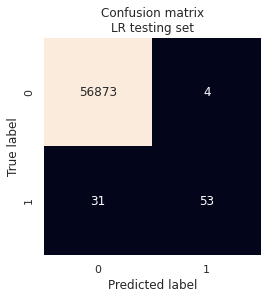

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(Y_testlr, y_preds_lr)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.title("Confusion matrix\nLR testing set")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
print(classification_report(Y_testlr, y_preds_lr, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56877
           1       0.93      0.63      0.75        84

    accuracy                           1.00     56961
   macro avg       0.96      0.82      0.88     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
#svm_parameters = [{"kernel": ['rbf', "poly"], "gamma":[1e-3, 1e-4], "C":[1,10,100]}]
#score_svm = ['precision', 'recall']

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report 
# from sklearn.svm import SVC
# for scores_svm in score_svm:
#   print("---- Tuning hyperparameters for %s ----" % scores_svm)
#   print()

#   svm = GridSearchCV(SVC(), svm_parameters, cv=5, scoring='%s_macro' % scores_svm)
#   svm.fit(X_trainsvm, Y_trainsvm)

#   print('The best parameters found on the training data set are:')
#   print()
#   print(svm.best_params_)
#   print()
#   print('The Grid Scores on the Training dataset are:')
#   print()

#   mean_svm = svm.cv_results_['mean_test_score']
#   std_svm = svm.cv_results_['std_test_score']

#   for mean, std, params in zip(mean_svm, std_svm, svm.cv_results_['params']):
#     print('%0.3f (+/-%0.03f) for %r' %(mean, std * 2, params))

#   print()

#   print('Classification report')
#   print()

#   ytrue_testsvm, ypred_testsvm = Y_testsvm, svm.predict(X_testsvm)

#   print(classification_report(ytrue_testsvm, ypred_testsvm, zero_division=0))
#   print()

In [ ]:
# #Bar Graph
# #count how many transactions were predicted to be legit and how many predicted fraud
# preds = [sum(ypred_testsvm == 0), sum(ypred_testsvm == 1)]
# plt.figure(figsize = (7,7))
# #create a barplot to visualize prediction count
# splot = sns.barplot(x = ["legit", "fraud"], y =  preds)
# plt.title("Predictions on test SVM")
# plt.xlabel("Predictions")
# plt.ylabel("Count")

# # adds numbers above each bar
# for p in splot.patches:
#     splot.annotate(format(p.get_height(), '.0f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    xytext = (0, 9), 
#                    textcoords = 'offset points')
# corners = ((0, 0), (1000, 1000))
# splot.update_datalim(corners)
# plt.show()

In [ ]:
# #Confusion Matrix
# from sklearn.metrics import confusion_matrix
# conf_mat=confusion_matrix(ytrue_testsvm, ypred_testsvm)
# plt.figure(figsize=(4, 4))
# sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
# plt.title("Confusion matrix - SVM")
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.show()